In [1]:
from scipy.io import loadmat

import xarray as xr
import numpy as np

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cm_xml_to_matplotlib as cmxml

#where to find the data
adir_data= './../../paper_software/2020_fluxsat/data/'
adir_data2= './data/'
adir_figs= './figures/'

# Figure 1

In [2]:
#read in the data
ds1=xr.open_dataset(adir_data+'Corr_High.nc')
ds1.close()
ds2=xr.open_dataset(adir_data+'Corr_Full.nc') #Full: corelation using unfiltered daily data: 
ds2.close()

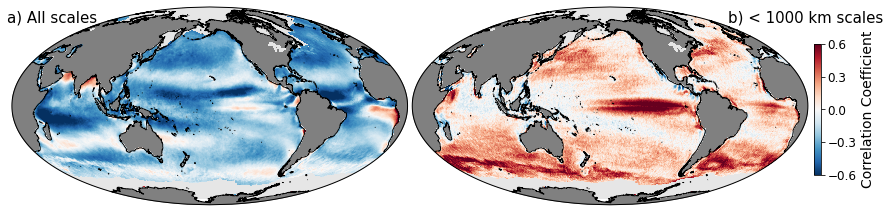

In [3]:
#remaking for larger colorbars and new a/b
bo_div = cmxml.make_cmap('./../cmap/blue-orange-div.xml') #make the Matplotlib compatible colormap
vv=.6
tem=xr.concat([ds2.sel(lon=slice(20,360)),ds2.sel(lon=slice(0,20))],dim='lon')
fig = plt.figure(figsize=(13, 4))
ax = plt.subplot(121,projection=ccrs.Mollweide(central_longitude=-160))
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap='RdBu_r',transform=ccrs.PlateCarree())
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0-0.1, pos1.y0,pos1.width*1.2, pos1.height*1.2] 
ax1 = ax.set_position(pos2) # set a new position

#cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
#cax.set_label('Correlation Coefficient',fontsize=16)

axt = plt.axes((.4, .8, .01, .01))
axt.axis('off')
axt.text(-38,5,'a) All scales',fontsize=15)
axt.text(39,5,'b) < 1000 km scales',fontsize=15)
tem=xr.concat([ds1.sel(lon=slice(20,360)),ds1.sel(lon=slice(0,20))],dim='lon')
ax = plt.subplot(122,projection=ccrs.Mollweide(central_longitude=-160))
#move lower figure up
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap='RdBu_r',transform=ccrs.PlateCarree())

pos1 = ax.get_position() # get the original position 
pos3 = [pos1.x0-0.095, pos1.y0,pos1.width*1.2, pos1.height*1.2] 

#add colorbar
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01, ticks=[-.6,-.3,0,.3,.6])
cax.set_label('Correlation Coefficient',fontsize=14)
cax.ax.tick_params(labelsize=12) 
#pos1 = ax.get_position() # get the original position 
#pos2 = [pos1.x0, pos1.y0+.05,pos1.width, pos1.height] 
ax = ax.set_position(pos3) # set a new position
#same for colorbar
cax1 = cax.ax
pos1 = cax1.get_position() # get the original position 
pos2 = [pos1.x0+.035, pos1.y0+.00,pos1.width, pos1.height*1.2] 
cax2 = cax1.set_position(pos2) # set a new position
#axt = plt.axes((.4, .13, .01, .01))
#axt.axis('off')
fig.savefig(adir_figs+'figure1_small_ver3.png', dpi=500)
fig.savefig(adir_figs+'figure1_small_ver3.pdf')

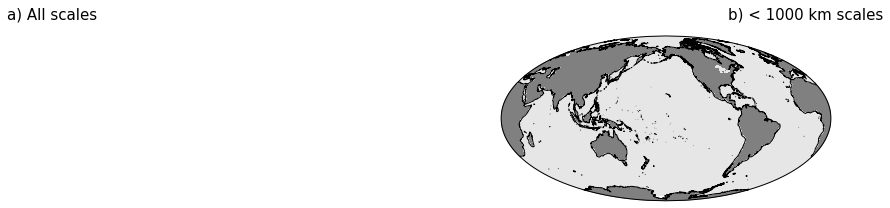

In [6]:
#remaking for larger colorbars and new a/b
bo_div = cmxml.make_cmap('./../cmap/blue-orange-div.xml') #make the Matplotlib compatible colormap
vv=.6
tem=xr.concat([ds2.sel(lon=slice(20,360)),ds2.sel(lon=slice(0,20))],dim='lon')
fig = plt.figure(figsize=(13, 4))
#ax = plt.subplot(121,projection=ccrs.Mollweide(central_longitude=-160))
#ax.add_feature(cfeature.LAND,facecolor='grey')
#ax.coastlines(resolution='50m', color='black', linewidth=1)
#ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
#ax1=ax.pcolormesh(tem.lon,tem.lat,tem.corrH,vmin=-vv,vmax=vv,cmap='RdBu_r',transform=ccrs.PlateCarree())
#pos1 = ax.get_position() # get the original position 
#pos2 = [pos1.x0-0.1, pos1.y0,pos1.width*1.2, pos1.height*1.2] 
#ax1 = ax.set_position(pos2) # set a new position

axt = plt.axes((.4, .8, .01, .01))
axt.axis('off')
axt.text(-38,5,'a) All scales',fontsize=15)
axt.text(39,5,'b) < 1000 km scales',fontsize=15)
tem=xr.concat([ds1.sel(lon=slice(20,360)),ds1.sel(lon=slice(0,20))],dim='lon')
ax = plt.subplot(122,projection=ccrs.Mollweide(central_longitude=-160))
#move lower figure up
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem.lon,tem.lat,tem.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())

pos1 = ax.get_position() # get the original position 
pos3 = [pos1.x0-0.095, pos1.y0,pos1.width*1.2, pos1.height*1.2] 

fig.savefig(adir_figs+'figure1_small_ver4.png', dpi=500, transparent=True)
fig.savefig(adir_figs+'figure1_small_ver4.pdf')

# Figure 2

In [7]:
tem = loadmat(adir_data+'Clayson_fluxDifferences.mat')
ds_err = xr.Dataset({'err_year': (['lat', 'lon'],  tem['combinedSD'].transpose()),
                    'err_DJF': (['lat', 'lon'],  tem['combinedSDdjf'].transpose()),
                    'err_JJA': (['lat', 'lon'],  tem['combinedSDjja'].transpose())},
                      coords={'lon': (['lon'], tem['longitude'][:,0]),
                              'lat': (['lat'], tem['latitude'][:,0])})

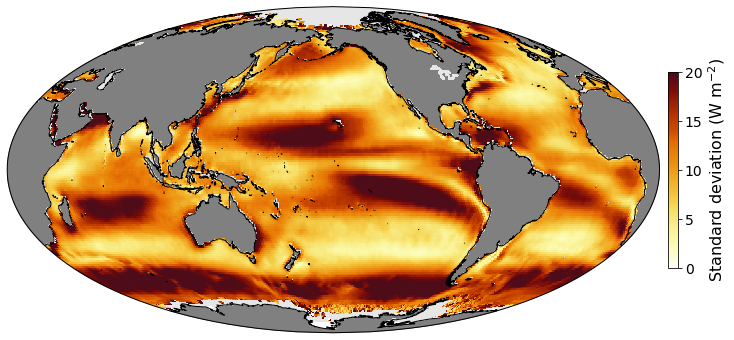

In [8]:
#make colorbar larger
cwave = cmxml.make_cmap('./../cmap/yelloworange5.xml') #make the Matplotlib compatible colormap
vv=.75
fig = plt.figure(figsize=(15, 6))
#read in Fig 1 data for masking Figure 2 data
tem1=xr.concat([ds1.sel(lon=slice(20,360)),ds1.sel(lon=slice(0,20))],dim='lon')
tem=xr.concat([ds_err.sel(lon=slice(20,360)),ds_err.sel(lon=slice(0,20))],dim='lon')
ax = plt.subplot(111,projection=ccrs.Mollweide(central_longitude=-160))
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem1.lon,tem1.lat,tem1.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.err_year,vmin=0,vmax=20,cmap=cwave,transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Standard deviation (W m$^{-2}$)',fontsize=16)
cax.ax.tick_params(labelsize=14) 
axt = plt.axes((.4, .26, .01, .01))
axt.axis('off')
fig.savefig(adir_figs+'figure2.png')

In [48]:
tem = loadmat(adir_data2+'yearlyStatsChelle.mat') 
ds_err = xr.Dataset({'mstd': (['lat', 'lon'],  tem['meanStdDev'].transpose()),
                    'mn': (['lat', 'lon'],  tem['spreadProducts'].transpose())},
                      coords={'lon': (['lon'], tem['longitude'][:,0]),
                              'lat': (['lat'], tem['latitude'][:,0])})
tem1=tem
tem = loadmat(adir_data2+'yearlyMeansChelle.mat')
ds_mn = xr.Dataset({'H': (['lat', 'lon'],  tem['LhfHMean'].transpose()),
                    'I': (['lat', 'lon'],  tem['LhfIMean'].transpose()),
                    'J': (['lat', 'lon'],  tem['LhfJMean'].transpose()),
                    'O': (['lat', 'lon'],  tem['LhfOMean'].transpose()),
                    'S': (['lat', 'lon'],  tem['LhfSMean'].transpose())},
                    coords={'lon': (['lon'], tem1['longitude'][:,0]),
                            'lat': (['lat'], tem1['latitude'][:,0])})


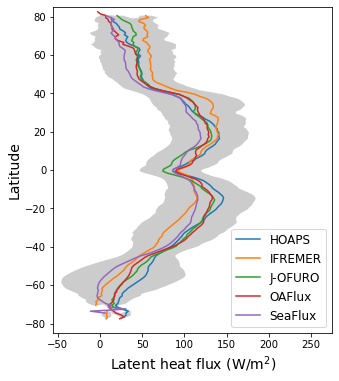

In [116]:
fig = plt.figure(figsize=(5, 6))
tem = ds_mn.mean('lon')
tem1 = ds_err.mean('lon')
plt.fill_betweenx(ds_mn.lat,tem.H-tem1.mn,tem.H+tem1.mn, facecolor='0.8', alpha=1)
plt.fill_betweenx(ds_mn.lat,tem.I-tem1.mn,tem.I+tem1.mn, facecolor='0.8', alpha=1)
plt.fill_betweenx(ds_mn.lat,tem.J-tem1.mn,tem.J+tem1.mn, facecolor='0.8', alpha=1)
plt.fill_betweenx(ds_mn.lat,tem.O-tem1.mn,tem.O+tem1.mn, facecolor='0.8', alpha=1)
plt.fill_betweenx(ds_mn.lat,tem.S-tem1.mn,tem.S+tem1.mn, facecolor='0.8', alpha=1)
plt.plot(tem.H,ds_mn.lat,label='HOAPS')
plt.plot(tem.I,ds_mn.lat,label='IFREMER')
plt.plot(tem.J,ds_mn.lat,label='J-OFURO')
plt.plot(tem.O,ds_mn.lat,label='OAFlux')
plt.plot(tem.S,ds_mn.lat,label='SeaFlux')
plt.ylim(-85,85)
plt.xlim(-55,275)
plt.xlabel('Latent heat flux (W/m$^2$)',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.legend(loc='lower right',fontsize=12)
fig.savefig(adir_figs+'figure2_lat.png')

In [114]:
i=15
tem.H[i].data,tem1.mn[i].data,(tem1.mn[i]/tem.H[i]).data*100

(array(30.98170019), array(5.15679596), 16.64465127623676)

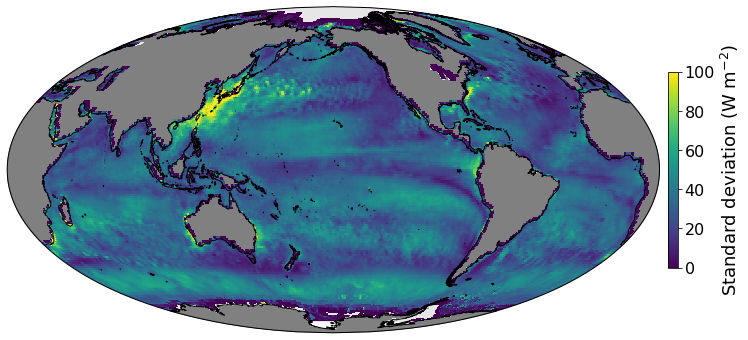

In [43]:
import cmocean 
vv=.75
fig = plt.figure(figsize=(15, 6))
#read in Fig 1 data for masking Figure 2 data
tem1=xr.concat([ds1.sel(lon=slice(20,360)),ds1.sel(lon=slice(0,20))],dim='lon')
tem=xr.concat([ds_err.sel(lon=slice(20,360)),ds_err.sel(lon=slice(0,20))],dim='lon')
ax = plt.subplot(111,projection=ccrs.Mollweide(central_longitude=-160))
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax0=ax.pcolormesh(tem1.lon,tem1.lat,tem1.mask,vmin=0,vmax=10,cmap='binary',transform=ccrs.PlateCarree())
ax1=ax.pcolormesh(tem.lon,tem.lat,tem.mn,vmin=0,vmax=100,cmap='viridis',transform=ccrs.PlateCarree())
cax=plt.colorbar(ax1,ax=ax, shrink=.6, pad=0.01)
cax.set_label('Standard deviation (W m$^{-2}$)',fontsize=18)
cax.ax.tick_params(labelsize=16) 
axt = plt.axes((.4, .26, .01, .01))
axt.axis('off')
fig.savefig(adir_figs+'figure2_test.png')

# Figure 3 data from clayson

In [ ]:
file = adir_data+'chelle.mat'
data = loadmat(file)
time = data['satTimes']
sat_lh = data['satLValues']
sat_wnd = data['satWValues']
sat_qs = data['satQsqaValues']
ship_time = data['ship_date']
ship_lh = data['ship_lhf']

xtime = data['ship_date']
xlon = data['ship_lon']
xlat = data['ship_lat']
dkm = np.abs((((xlon-xlon[0])**2+(xlat-xlat[0])**2)**.5)*111*np.cos(np.pi*xlat[0]/180))
ilen = dkm.size
#caluclate total cummulative distance traveled
dkm2=dkm
for i in range(1,ilen): 
    dkm2[i] = dkm2[i-1]+abs(np.abs((((xlon[i]-xlon[i-1])**2+(xlat[i]-xlat[i-1])**2)**.5)*111*np.cos(np.pi*xlat[i]/180)))
ind=(ilen-1)*np.arange(0,1.2,.2)
xstr=[]
for ii in ind:
    tem = dkm.item(int(ii))
    xstr.append("%.0f" % tem)
xstr2=[]
for ii in ind:
    tem = dkm2.item(int(ii))
    xstr2.append("%.0f" % tem)

tem=[]
for i in range(ship_time.size):
    tt = data['ship_date'][i]
    dd= int(np.floor(tt))
    hh = int(np.floor(  (tt - dd) * 24 ))
    mm = int(np.floor ( (((tt - dd) * 24 ) - hh) * 60 ))
    tem0=np.datetime64('0000-01-01')+np.timedelta64(dd,'D')+np.timedelta64(hh,'h')+np.timedelta64(mm,'m')
    tem.append(tem0)
ship_date = tem

tem=[]
for i in range(sat_lh.size):
    tt = data['satTimes'][0,i]
    dd= int(np.floor(tt))
    hh = int(np.floor(  (tt - dd) * 24 ))
    mm = int(np.floor ( (((tt - dd) * 24 ) - hh) * 60 ))
    tem0=np.datetime64('0000-01-01')+np.timedelta64(dd,'D')+np.timedelta64(hh,'h')+np.timedelta64(mm,'m')
    tem.append(tem0)
sat_date = tem


In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=5, constrained_layout=True,figsize=(5, 11))
cm = plt.cm.get_cmap('RdYlBu_r')
for i in range(5):
    x1,x2=sat_date,ship_date
    cc1,cc2 = data['satSstValues'][0,:],data['ship_sst']
    if i==0:
        y1,y2=data['satWValues'][0,:],data['ship_wspd']
        ax=axes[i]
        ylab,ystr='(ms$^{-1}$)','(a) Wind'
    if i==1:
        y1,y2=data['satTstaValues'][0,:],data['ship_tsta']
        ax = axes[i] 
        ylab,ystr='($\circ$C)','(b) -T$_{sea-air}$'
    if i==2:
        y1,y2=data['satQsqaValues'][0,:],data['ship_qsqa'].T
        ax=axes[i]
        ylab,ystr='(g kg$^{-1}$)','(c) -Q$_{sea-air}$'
    if i==3:
        y1,y2=data['satLValues'][0,:],data['ship_lhf']
        ax=axes[i]
        ylab,ystr='(Wm$^{-2}$)','(d) Latent HF'
    if i==4:
        y1,y2=data['satShfValues'][0,:],data['ship_shf']
        ax=axes[i]
        ylab,ystr='(Wm$^{-2}$)','(e) Sensible HF'

        
    ax.plot(x1,y1,'k',zorder=1,label='analysis')
    ax.plot(x2,y2,'k',zorder=1,label='ship')
    p1 = ax.scatter(x1,y1,marker='v',zorder=2,c=cc1,vmin=3,vmax=20,label='analysis',cmap=cm)
    ax.scatter(x2,y2,c=cc2,label='ship',zorder=2,cmap=cm,vmin=3,vmax=20)
    ax.text(x2[0]+np.timedelta64(1,'h'),y2[-1]-.1*(y2[-1]-y2[0]),ystr,size=16)
    ax.set_xlim(x2[0],x2[-1])
    ax.set_ylabel(ylab)
    if i==0:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[2:4], labels[2:4],loc='lower right')
        #ax.legend(loc='lower right')
    #ax.set_xticks(rotation=70)
    plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
    if i<4:
        labels = [item.get_text() for item in ax.get_xticklabels()]
        empty_string_labels = ['']*len(labels)
        ax.set_xticklabels(empty_string_labels)
    else:
        ax2 = ax.twiny()
        # Add some extra space for the second axis at the bottom
        #fig.subplots_adjust(bottom=0.2)
        # Move twinned axis ticks and label from top to bottom
        ax2.xaxis.set_ticks_position("bottom")
        ax2.xaxis.set_label_position("bottom")
        # Offset the twin axis below the host
        ax2.spines["bottom"].set_position(("axes", -0.4))
        ax1Ticks = ax.get_xticks()   
        ax2Ticks = ax1Ticks
        new_tick_locations = np.array([0,.2,.4,.6,.8,1])
        ax2.set_xticks(new_tick_locations)
        ax2.set_xticklabels(xstr2)
        ax2.set_xlabel('distance along ship track (km)')

fig.colorbar(p1,orientation='horizontal',label='SST ($^\circ$C)',aspect=45)
fig.savefig(adir_figs+'figure3.png')


In [ ]:
for i in range(35):
    print(data['ship_lhf'][i][0],data['ship_shf'][i][0])

# Figure 4

In [ ]:
#where to find the data
adir= 'F:/data/fluxsat/wrf_data/'

#Left (right) column – latent (sensible)

#Row 1: time_mean_lh(sh)_gradient in the file meansdrmsd_lhsh_gradient_0125deg.nc

#                Titles: LH (SH) flux gradient mean at 0.125 deg

#Row 2: rmsd_lh(sh)_gradient_noshift_3hrforward in the same file: meansdrmsd_lhsh_gradient_0125deg.nc

#                Titles: LH (SH) gradient RMSD diff at 0.125 deg

#Row 3: time_mean_lh(sh)_gradient in the file meansdrmsd_lhsh_gradient_05deg.nc

#                Titles: LH (SH) gradient mean at 0.5 deg

#read in the data
ds4=xr.open_dataset(adir_data+'meansdrmsd_lhsh_gradient_0125deg.nc') #Full: corelation using unfiltered daily data: 
ds4.coords['lon'] = (ds4.coords['lon'] + 180) % 360 - 180
ds4.close()
ds5=xr.open_dataset(adir_data+'meansdrmsd_lhsh_gradient_05deg.nc') #Full: corelation using unfiltered daily data: 
ds5.coords['lon'] = (ds5.coords['lon'] + 180) % 360 - 180
ds5.close()


In [ ]:
bheader0='Modeled flux gradient variability'
bheader1='Impact of temporal offset of input variables on flux gradient variability'
bheader2='Impact of spatial resolution of input variables on mean flux gradient'


In [ ]:
ds4

In [ ]:
cwave = cmxml.make_cmap('./../cmap/yelloworange5.xml') #make the Matplotlib compatible colormap
proj = ccrs.PlateCarree(central_longitude=-160)
fig, axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True,subplot_kw=dict(projection=proj),figsize=(10, 9))
for i in range(6):
    if i==0:
        tem=ds4.time_mean_lh_gradient
        vv0,vv=0,1.5
        ax = axes[0,0] 
    if i==1:
        tem=ds4.time_mean_sh_gradient
        vv0,vv=0,.5
        ax=axes[0,1]
    if i==2:
        tem=ds4.rmsd_lh_gradient_noshift_3hrforward
        vv0,vv=0,1.5
        ax=axes[1,0]
    if i==3:
        tem=ds4.rmsd_sh_gradient_noshift_3hrforward
        vv0,vv=0,.5
        ax=axes[1,1]
    if i==4:
        tem=ds5.time_mean_lh_gradient
        vv0,vv=0,1.5
        ax=axes[2,0]
    if i==5:
        tem=ds5.time_mean_sh_gradient
        vv0,vv=0,.5
        ax=axes[2,1]
        
    tem=tem.where(tem!=-9999).sel(lon=slice(-75,-35),lat=slice(32,52))
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    ax1=ax.pcolormesh(tem.lon,tem.lat,tem*100,vmin=vv0,vmax=100*vv,cmap=cwave,transform=ccrs.PlateCarree())
    ax.set_extent([-75,-35,32,51])
    bx1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='grey', alpha=0.5, linestyle='--')
    bx1.xlabels_top = False; bx1.ylabels_left = True
    bx1.ylabels_right = False; bx1.xlines = False
    bx1.xlocator = mticker.FixedLocator([-75,-65,-55,-45,-35])
    bx1.xformatter = LONGITUDE_FORMATTER; bx1.yformatter = LATITUDE_FORMATTER

    if i>3:
        # create color bar
        box = ax.get_position()
        if i==4:
            xx3=.035
        if i==5:
            xx3=-0.005
        axColor = plt.axes([box.x0+xx3, box.y0 - 0.06, box.width*.9, 0.02])
        plt.colorbar(ax1, cax = axColor, orientation="horizontal")
        plt.xlabel('(W m$^{-2}$ 100 km$^{-1}$)')
    pos1 = ax.get_position() # get the original position 
    pos2 = [pos1.x0, pos1.y0,pos1.width*1.1, pos1.height*.9] 
    if i==1 or i==3 or i==5:
        pos2 = [pos1.x0-.04, pos1.y0,pos1.width*1.1, pos1.height*.9] 
    ax.set_position(pos2) # set a new position
  
axt = plt.axes((.5, .5, .01, .01))
axt.axis('off')
axt.text(-32,35.3,'(a) LHF gradient mean at 0.125$^\circ$',fontsize=10)
axt.text(6,35.3,'(b) SHF gradient mean at 0.125$^\circ$',fontsize=10)
axt.text(-32,8.6,'(c) LHF gradient RMSD, offset wind speed',fontsize=10)
axt.text(6,8.6,'(d) SHF gradient RMSD, offset wind speed',fontsize=10)
axt.text(-32,-18,'(e) LHF gradient mean, 0.5$^\circ$ inputs',fontsize=10)
axt.text(6,-18,'(f) SHF gradient mean, 0.5$^\circ$ inputs',fontsize=10)

axt.text(-15,37,bheader0,fontsize=14)
axt.text(-33.5,10.5,bheader1,fontsize=14)
axt.text(-32,-16,bheader2,fontsize=14)

fout=adir_figs+'figure4.png'
print(fout)
fig.savefig(fout)
